In [1]:
import numpy as np
import pandas as pd

In [2]:
col_names = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names=col_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
# Merge two dataframes into one, union by item_id
df = pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('white')

In [19]:
# Find mean rating of each movie
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [20]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [21]:
# We may think these are movies with best ratings, but it could be 
# that only 1 or 2 people have watched them and happens to give them high ratings (groupby)
# Which movies have the largest amount of ratings?

df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [22]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
# To have an idea of the number of ratings, create a 'number of ratings' column

ratings['num_of_ratings'] = df.groupby('title')['rating'].count()

In [25]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


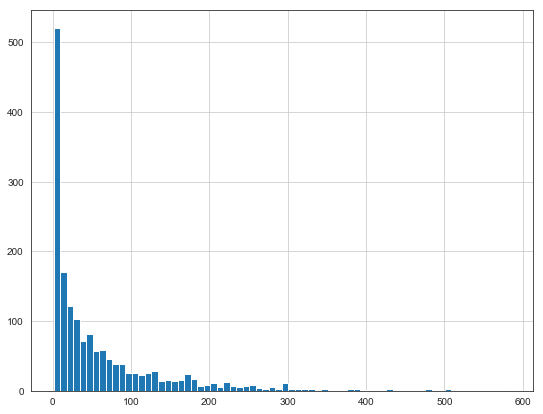

In [49]:
# A small amount of movies have larger ratings count, since a small amt of movies 
# could be blockbusters that more people watch

plt.figure(figsize=(9,7))
ratings['num_of_ratings'].hist(bins=70)

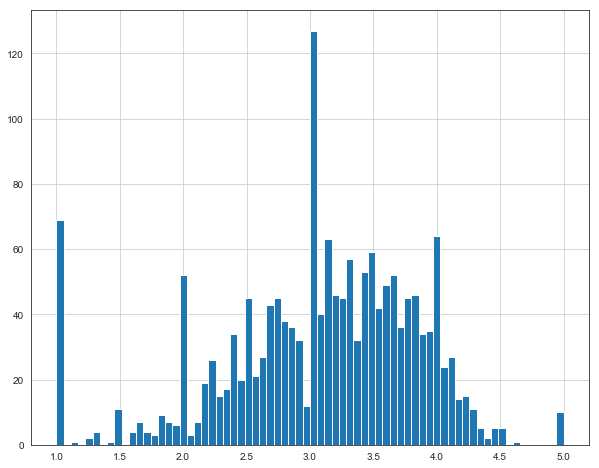

In [48]:
# Histogram of ratings
# The ratings have peaks at whole numbers

plt.figure(figsize=(10,8))
ratings['rating'].hist(bins=70)

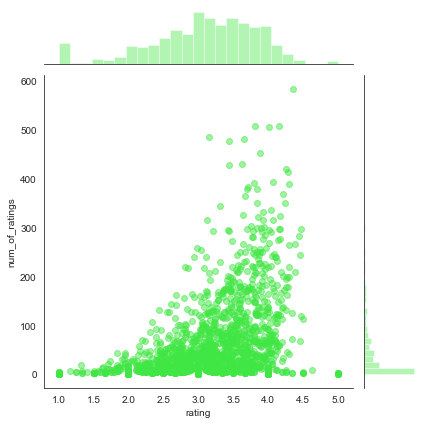

In [40]:
# Relationship between the average rating and the number of ratings
sns.jointplot(ratings['rating'],ratings['num_of_ratings'],ratings,color='#40e643',alpha=0.5)

### Recommender system by similarity

In [41]:
# Let's create a matrix of user ids (rows) and movie titles (columns)
# Each cell will consists of the rating the user gave to that movie
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [50]:
# Creating a pivot table
moviematrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [51]:
# Lots of NaNs, because not every user watched every movie
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Pick up most rated movies
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [53]:
# Pick 2 movies:
starwars_user_ratings = moviematrix['Star Wars (1977)']
liarliar_user_ratings = moviematrix['Liar Liar (1997)']

In [54]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [56]:
# 'corrwith' computes correlation between two dataframe objects
# 1. correlation of all the movies with Star Wars

similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)

In [57]:
# 2. correlation of all movies to Liar Liar
similar_to_liarliar = moviematrix.corrwith(liarliar_user_ratings)

In [59]:
# Clean up NaNs
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [60]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [62]:
# It seems that if we sort corr_starwars, we'd get the most similarly rated movies. 
# But, sometimes it gives unexpected results (obscure movies):

corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [64]:
# Filter out movies that don't make a certain threshold number.
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])

# using join because the title is the index; makes it easier to use join.

In [65]:
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [76]:
# Now it makes more sense
corr_starwars[corr_starwars['num_of_ratings'] > 100].sort_values('Correlation',
                                                                 ascending=False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [68]:
# Do the same with Liar Liar

corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [69]:
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])

In [78]:
corr_liarliar[corr_liarliar['num_of_ratings'] > 50].sort_values('Correlation',
                                                                 ascending=False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
